# 第三回：布局格式定方圆
原始教程参见 DataWhale 第二十期的组队学习教程,地址: https://github.com/datawhalechina/fantastic-matplotlib     
2020.12.20打卡

In [6]:
from matplotlib import __version__
print(__version__) #查看安装的 matplotlib 的版本

3.3.3


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

## 一、子图

### 1. 使用 `plt.subplots` 绘制均匀状态下的子图

返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列

`figsize` 参数可以指定整个画布的大小

`sharex` 和 `sharey` 分别表示是否共享横轴和纵轴刻度

`tight_layout` 函数可以调整子图的相对大小使字符不会重叠

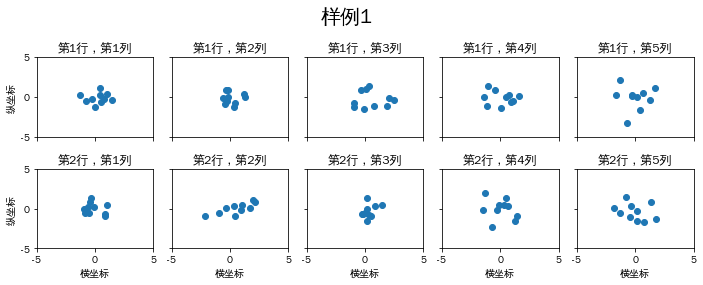

In [8]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

####  centos下的 SimHei 字体显示出了问题
使用如下命令查看系统自带的字体,发现有 WenQuanYi Zen Hei 字体,可以支持中文显示,在开头的字体设置中,将 SimHei 改为 WenQuanYi Zen Hei 后,中文显示正常.

In [4]:
import matplotlib.font_manager
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

AR PL UMing CN
Abyssinica SIL
C059
C059
C059
C059
Caladea
Caladea
Caladea
Caladea
Cantarell
Cantarell
Cantarell
Cantarell
Carlito
Carlito
Carlito
Carlito
D050000L
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
FreeMono
FreeMono
FreeMono
FreeMono
FreeSans
FreeSans
FreeSans
FreeSans
FreeSerif
FreeSerif
FreeSerif
FreeSerif
Jomolhari
Khmer OS
Khmer OS Content
Khmer OS System
LKLUG
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Serif
Liberation Serif
Liberation Serif

除了常规的直角坐标系，也可以通过`projection`方法创建极坐标系下的图表

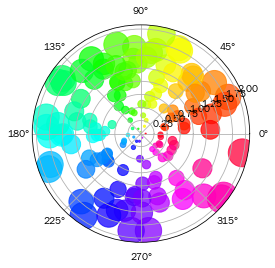

In [9]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

### 2. 使用 `GridSpec` 绘制非均匀子图

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`

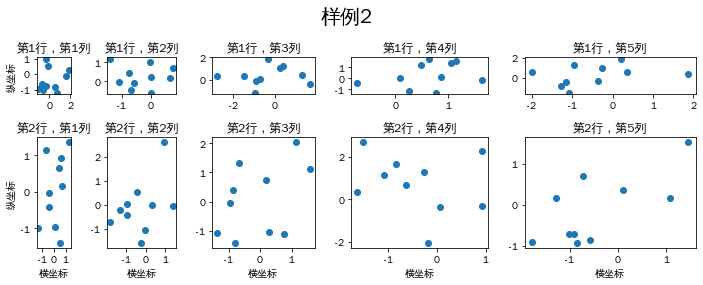

In [10]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

在上面的例子中出现了 `spec[i, j]` 的用法，事实上通过切片就可以实现子图的合并而达到跨图的共能

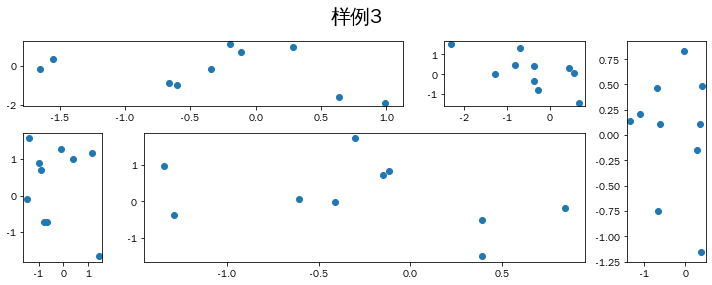

In [11]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

## 二、子图上的方法

在 `ax` 对象上定义了和 `plt` 类似的图形绘制函数，常用的有： `plot, hist, scatter, bar, barh, pie`

### plt

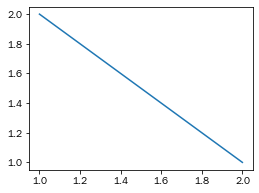

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot([1,2],[2,1])

### hist

(array([  4.,  25.,  83., 129., 233., 238., 157.,  95.,  28.,   8.]),
 array([-3.18447586, -2.55947753, -1.9344792 , -1.30948087, -0.68448254,
        -0.05948421,  0.56551412,  1.19051245,  1.81551078,  2.44050911,
         3.06550743]),
 <BarContainer object of 10 artists>)

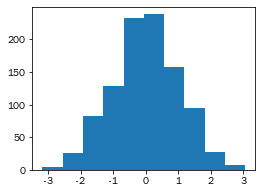

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(np.random.randn(1000))

### scatter

### bar

TypeError: bar() missing 1 required positional argument: 'height'

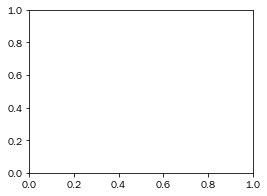

In [95]:
fig, ax = plt.subplots(figsize=(4,3))
ax.bar()

### barh

### pie

常用直线的画法为： `axhline, axvline, axline` （水平、垂直、任意方向）

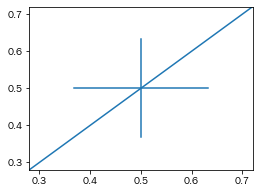

In [14]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
ax.axline([0.3,0.3],[0.7,0.7])

使用 `grid` 可以加灰色网格

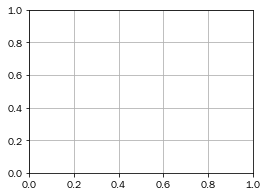

In [15]:
fig, ax = plt.subplots(figsize=(4,3))
ax.grid(True)

使用 `set_xscale, set_title, set_xlabel` 分别可以设置坐标轴的规度（指对数坐标等）、标题、轴名

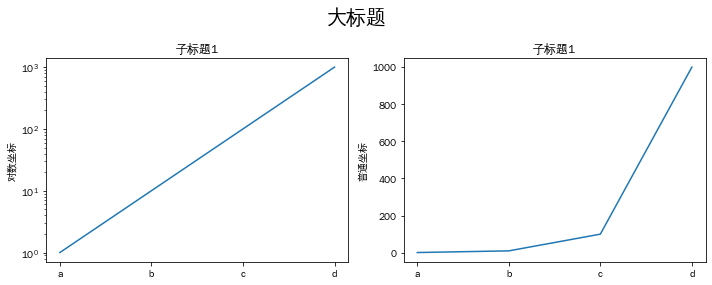

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('大标题', size=20)
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('对数坐标')
    else:
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('普通坐标')
fig.tight_layout()

与一般的 `plt` 方法类似， `legend, annotate, arrow, text` 对象也可以进行相应的绘制

Text(0.8, 0.2, '这是中点')

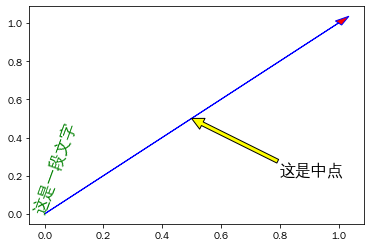

In [17]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width=0.03, head_length=0.05, facecolor='red', edgecolor='blue')
ax.text(x=0, y=0,s='这是一段文字', fontsize=16, rotation=70, rotation_mode='anchor', color='green')
ax.annotate('这是中点', xy=(0.5, 0.5), xytext=(0.8, 0.2), arrowprops=dict(facecolor='yellow', edgecolor='black'), fontsize=16)

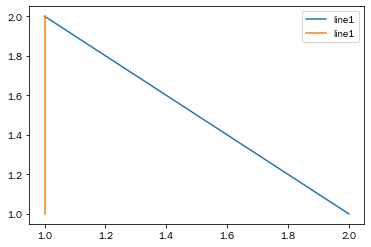

In [18]:
fig, ax = plt.subplots()
ax.plot([1,2],[2,1],label="line1")
ax.plot([1,1],[1,2],label="line1")
ax.legend(loc=1)

其中，图例的 `loc` 参数如下：

|  string   | code  |
|  ----  | ----  |
| best  | 0 |
| upper right  | 1 |
| upper left  | 2 |
| lower left  | 3 |
| lower right  | 4 |
| right  | 5 |
| center left  | 6 |
| center right  | 7 |
| lower center  | 8 |
| upper center  | 9 |
| center  | 10 |

## 作业

### 1. 墨尔本1981年至1990年的每月温度情况

In [19]:
ex1 = pd.read_csv('data/layout_ex1.csv')
ex1.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


- 请利用数据，画出如下的图：

<img src="https://s1.ax1x.com/2020/11/01/BwvCse.png" width="800" align="bottom" />

In [85]:
data = ex1.Time.str.split('-',expand=True)
data.columns = ['年份','月份']
data['气温'] = ex1.Temperature
data = data.pivot(index='月份',columns='年份',values='气温')
data.index=range(1,13)
data#.pivot(columns=['月份'])

年份,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
1,17.712903,16.567742,13.180645,14.309677,14.219355,13.825806,13.235484,16.493548,15.180645,15.577419
2,17.678571,15.921429,16.807143,14.944828,14.032143,14.196429,13.889286,14.524138,16.371429,15.417857
3,13.500000,14.935484,15.777419,12.867742,15.877419,14.690323,12.619355,14.748387,15.803226,14.835484
4,12.356667,11.470000,10.596667,10.750000,12.976667,11.653333,12.250000,12.833333,12.563333,13.433333
5,9.490323,9.583871,10.116129,8.112903,9.419355,10.274194,9.806452,11.387097,10.725806,9.748387
6,7.306667,5.606667,6.600000,7.730000,7.073333,7.526667,8.273333,8.386667,6.560000,7.720000
7,7.577419,4.641935,6.890323,5.987097,6.135484,6.961290,5.983871,8.232258,6.332258,8.183871
8,7.238710,7.903226,8.706452,8.696774,7.635484,7.387097,8.022581,8.725806,6.770968,7.825806
9,10.143333,7.280000,9.210000,8.046667,8.803333,8.933333,9.810000,9.883333,8.486667,9.166667
10,10.087097,9.545161,10.312903,10.632258,10.490323,9.683871,10.238710,10.890323,9.867742,11.345161


In [86]:
data.iloc[:,1]

1     16.567742
2     15.921429
3     14.935484
4     11.470000
5      9.583871
6      5.606667
7      4.641935
8      7.903226
9      7.280000
10     9.545161
11    12.486667
12    13.754839
Name: 1982, dtype: float64

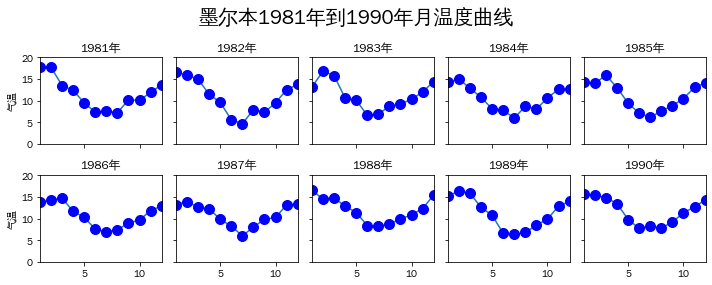

In [98]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('墨尔本1981年到1990年月温度曲线', size=20)
for i in range(2):
    for j in range(5):
        #x = data.index
        y = data.iloc[:,5*i+j]
        axs[i][j].plot(y, marker='o', markersize=10,markeredgecolor='blue', markerfacecolor='blue')
        axs[i][j].set_title(f'{y.name}年')
        axs[i][j].set_xlim(1,12)
        axs[i][j].set_ylim(0,20)
        #if i==1: axs[i][j].set_xlabel('')
        if j==0: axs[i][j].set_ylabel('气温')
fig.tight_layout()

### 2. 画出数据的散点图和边际分布

- 用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

<img src="https://s1.ax1x.com/2020/11/01/B0pEnS.png" width="400" height="400" align="bottom" />

In [135]:
dt2 = np.random.randn(2, 150)

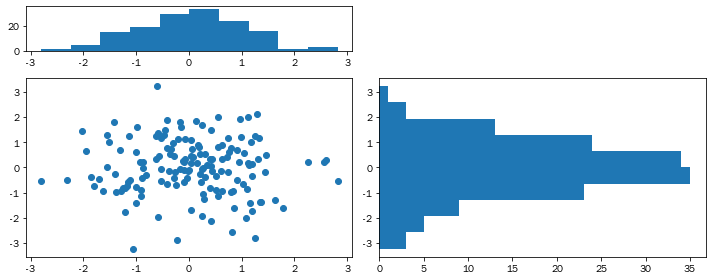

In [137]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1,1], height_ratios=[1,4])
#fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, 0])
ax.hist(dt2[0])
# sub2
ax = fig.add_subplot(spec[1, 0])
ax.scatter(dt2[0],dt2[1])
# sub3
ax = fig.add_subplot(spec[1, 1])
ax.hist(dt2[1],orientation ='horizontal')
fig.tight_layout()